# Lab 2 Sample Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=0.03):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args參數:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 50 nodes
        # hidden layer 3: 10 nodes
        # Please initiate your network parameters here.
        input_dim = 2
        hidden1_dim = 100
        hidden2_dim = 50
        hidden3_dim = 10
        output_dim = 1
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
        self.hidden1_weights = np.random.randn(2, 100) 
        self.hidden1_bias = np.zeros((1, 100))
        self.hidden2_weights = np.random.randn(100, 50)
        self.hidden2_bias = np.zeros((1, 50))
        self.hidden3_weights = np.random.randn(50, 10)
        self.hidden3_bias = np.zeros((1, 10))
        self.output_weights = np.random.randn(10, 1)
        self.output_bias = np.zeros((1, 1))
    @staticmethod
    
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        
        
        hidden1_input = inputs
        hidden1_output = np.dot(hidden1_input,self.hidden1_weights) + self.hidden1_bias
        hidden1_output = sigmoid(hidden1_output)

        hidden2_input = hidden1_output
        hidden2_output = np.dot(hidden2_input,self.hidden2_weights) + self.hidden2_bias
        hidden2_output = sigmoid(hidden2_output)

        hidden3_input = hidden2_output
        hidden3_output = np.dot(hidden3_input,self.hidden3_weights) +self.hidden3_bias
        hidden3_output = sigmoid(hidden3_output)
        
        self.inputs = inputs
        self.hidden1_output = hidden1_output
        self.hidden2_output = hidden2_output
        self.hidden3_output = hidden3_output
        
        output = sigmoid(np.dot(hidden3_output, self.output_weights) + self.output_bias)
        self.output = output      
        return output
    
    def backward(self):
        """Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        # 輸出層的梯度
        d_output = self.error* der_sigmoid(self.output)
        d_output_weights = np.dot(self.hidden3_output.T, d_output)
        d_output_bias = np.sum(d_output, axis=0, keepdims=True)

        # 第三層的梯度
        d_hidden3 = np.dot(d_output, self.output_weights.T) * der_sigmoid(self.hidden3_output)
        d_hidden3_weights = np.dot(self.hidden2_output.T, d_hidden3)
        d_hidden3_bias = np.sum(d_hidden3, axis=0, keepdims=True)

        # 第二層的梯度
        d_hidden2 = np.dot(d_hidden3, self.hidden3_weights.T) * der_sigmoid(self.hidden2_output)
        d_hidden2_weights = np.dot(self.hidden1_output.T, d_hidden2)
        d_hidden2_bias = np.sum(d_hidden2, axis=0, keepdims=True)

        # 第一層的梯度
        d_hidden1 = np.dot(d_hidden2, self.hidden2_weights.T) * der_sigmoid(self.hidden1_output)
        d_hidden1_weights = np.dot(self.inputs.T, d_hidden1)
        d_hidden1_bias = np.sum(d_hidden1, axis=0, keepdims=True)

        # 更新權重和偏差
        self.output_weights -= self.learning_rate * d_output_weights
        self.output_bias -= self.learning_rate * d_output_bias
        self.hidden3_weights -= self.learning_rate * d_hidden3_weights
        self.hidden3_bias -= self.learning_rate * d_hidden3_bias
        self.hidden2_weights -= self.learning_rate * d_hidden2_weights
        self.hidden2_bias -= self.learning_rate * d_hidden2_bias
        self.hidden1_weights -= self.learning_rate * d_hidden1_weights
        self.hidden1_bias -= self.learning_rate * d_hidden1_bias
    def train(self, inputs, labels):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            total_loss = 0
            k=1
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx : idx + 1, :])
                self.error = self.output - labels[idx : idx + 1, :]
                loss = 0.5 * np.square(self.output - labels[idx : idx + 1, :])
                total_loss += loss
                self.backward()

            if epochs % self.print_interval == 0:
                print("Epochs {}: ".format(epochs), end="")
                self.test(inputs, labels)

        print("Training finished")
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")

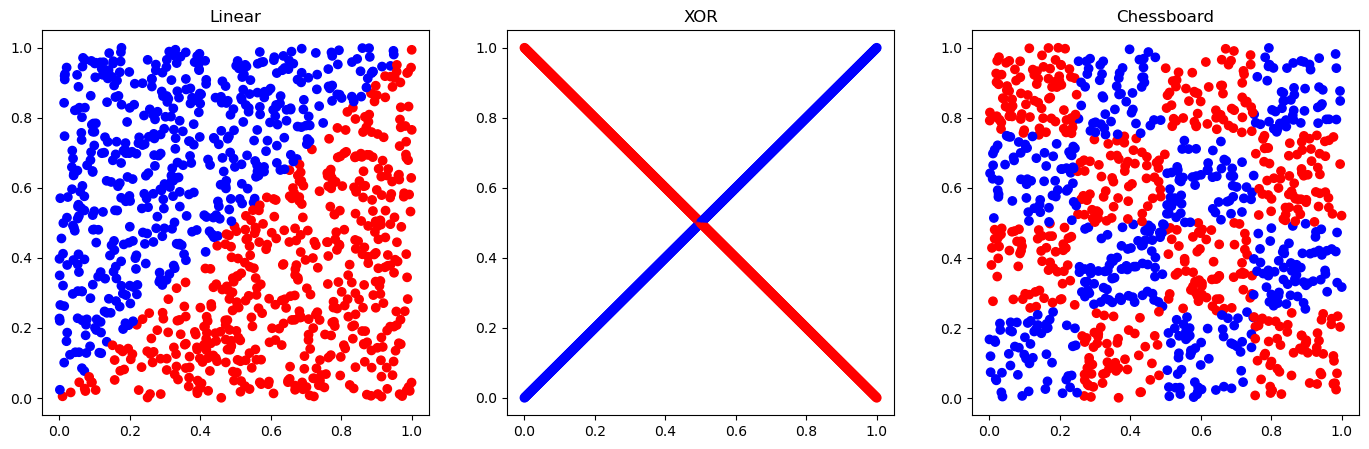

In [2]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epochs 0: accuracy: 55.61%
Epochs 100: accuracy: 95.49%
Epochs 200: accuracy: 96.95%
Epochs 300: accuracy: 97.60%
Epochs 400: accuracy: 97.99%
Epochs 500: accuracy: 98.25%
Epochs 600: accuracy: 98.43%
Epochs 700: accuracy: 98.57%
Epochs 800: accuracy: 98.68%
Epochs 900: accuracy: 98.77%
Epochs 1000: accuracy: 98.84%
Epochs 1100: accuracy: 98.89%
Epochs 1200: accuracy: 98.94%
Epochs 1300: accuracy: 99.00%
Epochs 1400: accuracy: 99.05%
Epochs 1500: accuracy: 99.10%
Epochs 1600: accuracy: 99.16%
Epochs 1700: accuracy: 99.21%
Epochs 1800: accuracy: 99.24%
Epochs 1900: accuracy: 99.28%
Epochs 2000: accuracy: 99.31%
Epochs 2100: accuracy: 99.33%
Epochs 2200: accuracy: 99.36%
Epochs 2300: accuracy: 99.39%
Epochs 2400: accuracy: 99.40%
Epochs 2500: accuracy: 99.40%
Epochs 2600: accuracy: 99.47%
Epochs 2700: accuracy: 99.50%
Epochs 2800: accuracy: 99.34%
Epochs 2900: accuracy: 99.55%
Training finished
accuracy: 99.56%


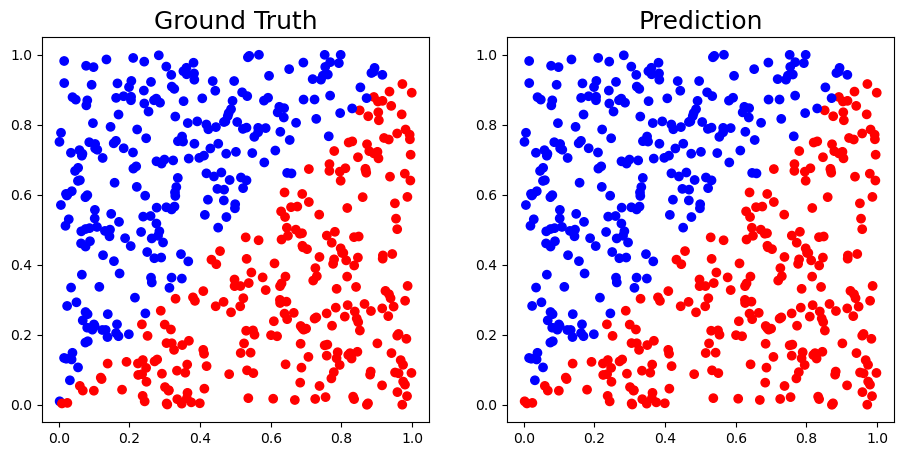

In [3]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)

net = SimpleNet(3000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "XOR"

Epochs 0: accuracy: 51.33%
Epochs 100: accuracy: 87.72%
Epochs 200: accuracy: 92.20%
Epochs 300: accuracy: 93.87%
Epochs 400: accuracy: 94.81%
Epochs 500: accuracy: 95.43%
Epochs 600: accuracy: 95.89%
Epochs 700: accuracy: 96.25%
Epochs 800: accuracy: 96.54%
Epochs 900: accuracy: 96.79%
Epochs 1000: accuracy: 96.99%
Epochs 1100: accuracy: 97.15%
Epochs 1200: accuracy: 97.27%
Epochs 1300: accuracy: 97.35%
Epochs 1400: accuracy: 97.46%
Epochs 1500: accuracy: 97.49%
Epochs 1600: accuracy: 97.54%
Epochs 1700: accuracy: 97.60%
Epochs 1800: accuracy: 97.66%
Epochs 1900: accuracy: 97.71%
Epochs 2000: accuracy: 97.75%
Epochs 2100: accuracy: 97.81%
Epochs 2200: accuracy: 97.87%
Epochs 2300: accuracy: 97.92%
Epochs 2400: accuracy: 97.98%
Epochs 2500: accuracy: 98.03%
Epochs 2600: accuracy: 98.08%
Epochs 2700: accuracy: 98.11%
Epochs 2800: accuracy: 98.10%
Epochs 2900: accuracy: 98.11%
Epochs 3000: accuracy: 98.11%
Epochs 3100: accuracy: 98.12%
Epochs 3200: accuracy: 98.18%
Epochs 3300: accuracy:

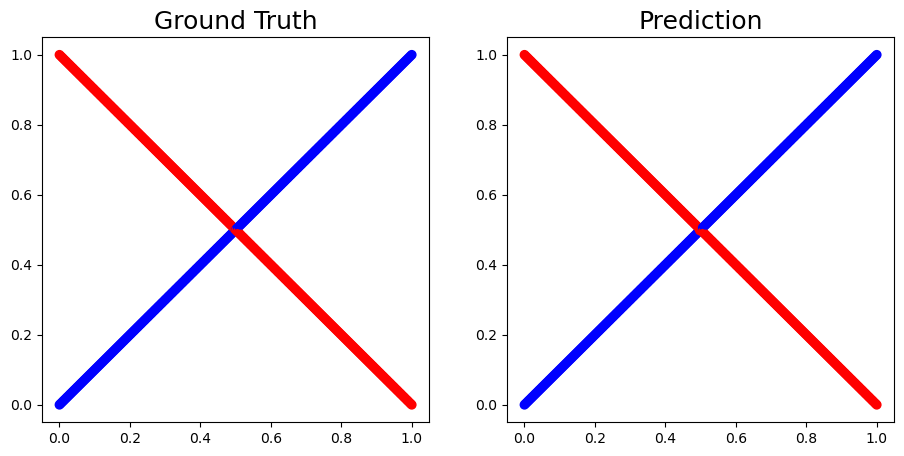

In [11]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(10000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "Chessboard"

Epochs 0: accuracy: 50.84%
Epochs 100: accuracy: 54.23%
Epochs 200: accuracy: 59.41%
Epochs 300: accuracy: 63.74%
Epochs 400: accuracy: 71.82%
Epochs 500: accuracy: 76.81%
Epochs 600: accuracy: 79.24%
Epochs 700: accuracy: 81.01%
Epochs 800: accuracy: 82.66%
Epochs 900: accuracy: 84.40%
Epochs 1000: accuracy: 87.44%
Epochs 1100: accuracy: 90.54%
Epochs 1200: accuracy: 92.07%
Epochs 1300: accuracy: 93.12%
Epochs 1400: accuracy: 93.79%
Epochs 1500: accuracy: 94.30%
Epochs 1600: accuracy: 94.72%
Epochs 1700: accuracy: 95.08%
Epochs 1800: accuracy: 95.39%
Epochs 1900: accuracy: 95.65%
Epochs 2000: accuracy: 95.77%
Epochs 2100: accuracy: 96.03%
Epochs 2200: accuracy: 96.26%
Epochs 2300: accuracy: 96.34%
Epochs 2400: accuracy: 96.44%
Epochs 2500: accuracy: 96.56%
Epochs 2600: accuracy: 96.70%
Epochs 2700: accuracy: 96.84%
Epochs 2800: accuracy: 97.07%
Epochs 2900: accuracy: 97.18%
Epochs 3000: accuracy: 97.35%
Epochs 3100: accuracy: 97.31%
Epochs 3200: accuracy: 97.44%
Epochs 3300: accuracy:

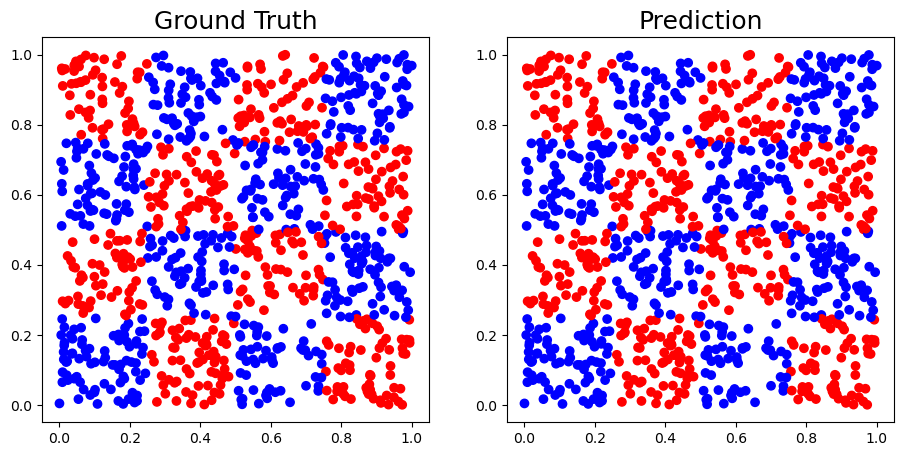

In [7]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(10000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)